# Bellabeat Case Study - Data Analysis Report

## Introduction

Welcome to my Bellabeat data analysis case study :)
In this project, I serve as a junior data analyst on the Bellabeat marketing analytics team, where I work to uncover insights from smart device usage data.

Bellabeat is a high-tech company that creates health-focused smart products for women.
Their product line includes:
- **Leaf**: a wellness tracker worn as a bracelet, necklace, or clip.
- **Time**: a wellness watch tracking activity, sleep, and stress.
- **Spring**: a smart water bottle that tracks hydration.
- **Bellabeat App**: integrates with devices to provide insights on activity, sleep, stress, menstrual cycles, and mindfulness habits.
- **Membership Program**: a subscription-based service offering personalised guidance on wellness, nutrition, sleep, and lifestyle goals.

For this analysis, I will focus on the **Membership Program**. My goal is to understand how users interact with Bellabeat smart devices and app features to inform strategies that can increase **membership engagement and retention**.

To structure my approach, I will follow the standard data analysis process:
1. Ask
2. Prepare
3. Process
4. Analyse
5. Share
6. Act

Through this notebook, I will demonstrate how data-driven insights can help Bellabeat improve its Membership Program, engage users more effectively, and support business growth.

## Step 1: Ask

### Business Task

As a junior data analyst at Bellabeat, my goal is to analyse smart device usage data from non-Bellabeat users to uncover trends in activity, sleep, and wellness habits. I will then apply these insights to the **Bellabeat Membership Program** to understand how users engage with health and wellness features, and identify opportunities to improve membership engagement and retention.

### Key Questions Guiding My Analysis

1. What trends exist in the usage of smart devices for health and wellness?
2. How can these trends inform the experience of Bellabeat Membership Program users?
3. How could these insights influence Bellabeat’s marketing strategy to increase membership adoption and engagement?

### Stakeholders

- **Urška Sršen** – Co-founder and Chief Creative Officer  
- **Sando Mur** – Co-founder and key executive team member  
- **Bellabeat Marketing Analytics Team** – My colleagues who rely on data insights to guide marketing decisions

### Deliverable for This Step

A clear statement of the business task:  
*I aim to explore smart device usage patterns and translate those insights into actionable recommendations to enhance the Bellabeat Membership Program and support marketing strategies.*


## Step 2: Prepare

### Data Sources and Credibility

For this analysis, I am using a **public Fitbit dataset** available on Kaggle. This dataset contains personal fitness tracker data from 30 consenting Fitbit users, including minute-level output for physical activity, heart rate, sleep, and daily summaries. Since this data is publicly available and comes from a reputable source (Fitbit Fitness Tracker), I can consider it **credible** for analysing general smart device usage trends.

I will focus on **daily-level data** to simplify the analysis and capture meaningful trends without being overwhelmed by minute-level data. This includes:
- Daily activity (`dailyActivity_merged.csv`)
- Daily calories (`dailyCalories_merged.csv`)
- Daily intensities (`dailyIntensities_merged.csv`)
- Daily steps (`dailySteps_merged.csv`)
- Daily sleep (`sleepDay_merged.csv`)
- Weight data (`weightLogInfo_merged.csv`)

### Setting Up the Environment

To begin, I load the necessary libraries for data manipulation, visualization, and reporting:

In [1]:
# Importing libraries
library(tidyverse)    # Data manipulation and visualization
library(scales)       # To transform numbers into percentages
library(RColorBrewer) # Color palettes
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘scales’




The following object is masked from ‘package:purrr’:

    discard




The following object is masked from ‘package:readr’:

    col_factor




### Loading the Data

In [2]:
daily_activity    <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_calories    <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
daily_intensities <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
daily_sleep       <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
daily_weight      <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
daily_steps       <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")

## Step 3: Process

### Inspecting the Data
Now that I have the raw data, I need to process it by cleaning, formatting, and preparing it for analysis.  
The goal here is to ensure data integrity so my findings are reliable.

### 3.1.1 Process: Daily Activity

In [3]:
# Viewing the first 5 rows of daily_activity
head(daily_activity, 5)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863


### 3.1.2 Removing some datasets
After reviewing the datasets, I observed that:
- 'daily_activity' already contains the information from:
1. 'daily_calories'
2. 'daily_steps'
3. 'daily_intensities'
- Each dataset also has the same number of observations.
Therefore, we can remove the redundant datasets to keep the workspace clean.

In [4]:
# Removing redundant datasets
rm(daily_calories, daily_intensities, daily_steps)

### 3.1.3 Cleaning Some Variables

Before merging the datasets, I will:

1. Standardise the date column names to 'Date'.  
2. Convert all date columns to the proper Date type.  
3. Remove unnecessary columns.  
4. Ensure categorical variables are stored as factors.

In [5]:
# daily_activity
if ("ActivityDate" %in% names(daily_activity)) {
  daily_activity <- daily_activity %>%
    rename(Date = ActivityDate)
}
daily_activity <- daily_activity %>%
  mutate(Date = as.Date(Date, format = "%m/%d/%Y"))

# daily_sleep
if ("SleepDay" %in% names(daily_sleep)) {
  daily_sleep <- daily_sleep %>%
    rename(Date = SleepDay)
}
daily_sleep <- daily_sleep %>%
  mutate(Date = as.Date(Date, format = "%m/%d/%Y"))

# weight_info (only if loaded)
if (exists("weight_info")) {
  if ("LogId" %in% names(weight_info)) {
    weight_info <- weight_info %>% select(-LogId)
  }
  weight_info <- weight_info %>%
    mutate(Date = as.Date(Date, format = "%m/%d/%Y"),
           IsManualReport = as.factor(IsManualReport))
}


### 3.1.4 Merging the dataframes
Merging daily_activity, daily_sleep, and daily_weight by Id and Date

In [6]:
final_df <- merge(merge(daily_activity, daily_sleep, by = c('Id', 'Date'), all = TRUE), daily_weight, by = c('Id', 'Date'), all = TRUE)

head(final_df)

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,⋯,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5-02-20,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5-03-20,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,⋯,1985,1,327,346,NA,NA,NA,NA,NA,NA
4,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,⋯,1797,2,384,407,NA,NA,NA,NA,NA,NA
5,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,⋯,1776,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,⋯,1745,1,412,442,NA,NA,NA,NA,NA,NA


### 3.1.5 Removing some extra variables
After inspecting final_df, I noticed:
- 'TotalDistance' and 'TrackerDistance' are identical → remove 'TrackerDistance'
- Other columns are not needed for our analysis: 
'LoggedActivitiesDistance', 'TotalSleepRecords', 'WeightPounds', 'Fat', 'BMI', 'IsManualReport'

In [7]:
# Standardize Date column
final_df$Date <- as.Date(final_df$Date, format = "%Y-%m-%d")
final_df$Date <- ifelse(is.na(final_df$Date), as.Date(final_df$Date, format = "%m-%d-%y"), final_df$Date)
final_df$Date <- as.Date(final_df$Date, origin = "1970-01-01") # if needed

# Columns to remove
cols_to_remove <- c("TrackerDistance", "LoggedActivitiesDistance",
                    "TotalSleepRecords", "LogId", "Fat", "BMI", "IsManualReport")

# Keep only columns that exist
cols_to_remove <- intersect(cols_to_remove, names(final_df))

# Remove unwanted columns
final_df <- final_df[, !(names(final_df) %in% cols_to_remove)]

# --- Fix date format ---
final_df$Date <- as.Date(final_df$Date, format = "%Y-%m-%d")
missing_dates <- is.na(final_df$Date)
final_df$Date[missing_dates] <- as.Date(final_df$Date[missing_dates], format = "%m-%d-%y")

# --- Remove rows where all activity columns are NA ---
activity_cols <- c("TotalSteps", "TotalDistance", "VeryActiveDistance", 
                   "ModeratelyActiveDistance", "LightActiveDistance",
                   "SedentaryActiveDistance", "VeryActiveMinutes", 
                   "FairlyActiveMinutes", "LightlyActiveMinutes", 
                   "SedentaryMinutes", "Calories")

final_df <- final_df[rowSums(!is.na(final_df[, activity_cols])) > 0, ]

# Check cleaned data
head(final_df)


,Id,Date,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutesAsleep,TotalTimeInBed,WeightKg,WeightPounds
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
3,1503960366,2016-04-12,13162,8.50,1.88,0.55,6.06,0,25,13,328,728,1985,327,346,NA,NA
4,1503960366,2016-04-13,10735,6.97,1.57,0.69,4.71,0,21,19,217,776,1797,384,407,NA,NA
5,1503960366,2016-04-14,10460,6.74,2.44,0.40,3.91,0,30,11,181,1218,1776,NA,NA,NA,NA
6,1503960366,2016-04-15,9762,6.28,2.14,1.26,2.83,0,29,34,209,726,1745,412,442,NA,NA
7,1503960366,2016-04-16,12669,8.16,2.71,0.41,5.04,0,36,10,221,773,1863,340,367,NA,NA
8,1503960366,2016-04-17,9705,6.48,3.19,0.78,2.51,0,38,20,164,539,1728,700,712,NA,NA


### 3.1.6 Checking the variables
1. Check data types of each column
2. Summary statistics for each variable

In [8]:
str(final_df)

'data.frame':	943 obs. of  17 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ Date                    : Date, format: "2016-04-12" "2016-04-13" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 1149 775 818 838 ...
 $ Calories                : int  1985 1797 1776 1745 1863 1728 1921 2035 1786 1775 ...
 $ TotalMinutesAsleep   

In [9]:
summary(final_df)

       Id                 Date              TotalSteps    TotalDistance   
 Min.   :1.504e+09   Min.   :2016-04-12   Min.   :    0   Min.   : 0.000  
 1st Qu.:2.320e+09   1st Qu.:2016-04-19   1st Qu.: 3795   1st Qu.: 2.620  
 Median :4.445e+09   Median :2016-04-26   Median : 7439   Median : 5.260  
 Mean   :4.858e+09   Mean   :2016-04-26   Mean   : 7652   Mean   : 5.503  
 3rd Qu.:6.962e+09   3rd Qu.:2016-05-04   3rd Qu.:10734   3rd Qu.: 7.720  
 Max.   :8.878e+09   Max.   :2016-05-12   Max.   :36019   Max.   :28.030  
                                                                          
 VeryActiveDistance ModeratelyActiveDistance LightActiveDistance
 Min.   : 0.000     Min.   :0.0000           Min.   : 0.000     
 1st Qu.: 0.000     1st Qu.:0.0000           1st Qu.: 1.950     
 Median : 0.220     Median :0.2400           Median : 3.380     
 Mean   : 1.504     Mean   :0.5709           Mean   : 3.349     
 3rd Qu.: 2.065     3rd Qu.:0.8050           3rd Qu.: 4.790     
 Max.   :2

### 3.1.7 Summary of Key Variables

Before I perform a detailed analysis, I find it useful to examine the key metrics in the consolidated dataset `final_df`.  
I focus on activity, sleep, and weight variables to understand their distributions, identify missing values, and detect potential outliers.

In [10]:
library(dplyr)

# Summary of key activity, sleep, and weight variables
summary_df <- final_df %>%
  select(
    TotalSteps, TotalDistance, VeryActiveDistance, ModeratelyActiveDistance, LightActiveDistance,
    SedentaryActiveDistance, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes,
    Calories, TotalMinutesAsleep, TotalTimeInBed, WeightKg
  ) %>%
  summary()

summary_df


   TotalSteps    TotalDistance    VeryActiveDistance ModeratelyActiveDistance
 Min.   :    0   Min.   : 0.000   Min.   : 0.000     Min.   :0.0000          
 1st Qu.: 3795   1st Qu.: 2.620   1st Qu.: 0.000     1st Qu.:0.0000          
 Median : 7439   Median : 5.260   Median : 0.220     Median :0.2400          
 Mean   : 7652   Mean   : 5.503   Mean   : 1.504     Mean   :0.5709          
 3rd Qu.:10734   3rd Qu.: 7.720   3rd Qu.: 2.065     3rd Qu.:0.8050          
 Max.   :36019   Max.   :28.030   Max.   :21.920     Max.   :6.4800          
                                                                             
 LightActiveDistance SedentaryActiveDistance VeryActiveMinutes
 Min.   : 0.000      Min.   :0.000000        Min.   :  0.00   
 1st Qu.: 1.950      1st Qu.:0.000000        1st Qu.:  0.00   
 Median : 3.380      Median :0.000000        Median :  4.00   
 Mean   : 3.349      Mean   :0.001601        Mean   : 21.24   
 3rd Qu.: 4.790      3rd Qu.:0.000000        3rd Qu.: 32.00  

### 3.1.8 Summary of Key Variables

The dataset shows varied activity and sleep patterns. Median daily steps are 7,439, with a median distance of 5.26 km, while very active distances and minutes indicate occasional intense workouts. Sedentary time is high (median 1,057 minutes), and calories burned vary widely (median 2,140 kcal). Median sleep duration is 433 minutes, though 530 records are missing. Weight data is mostly unavailable, limiting weight-related analysis.


## Step 4: Analyze

### 4.1 Daily Step Counts

In this plot, each point represents the step count of an individual user. The jittered points prevent overlap and show the distribution of activity across the week.

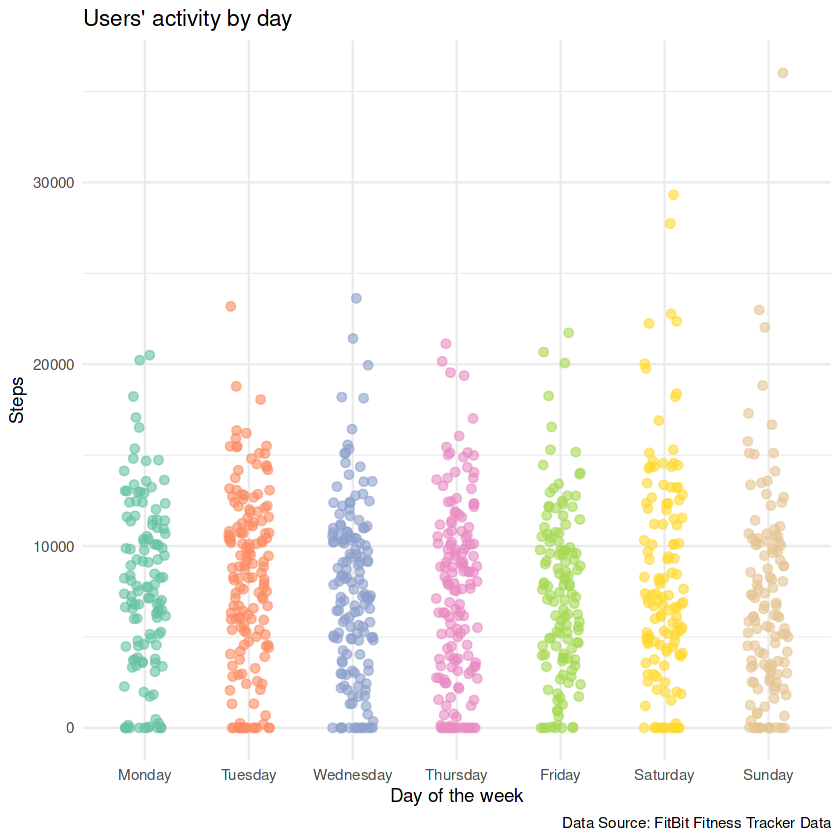

In [11]:
final_df %>%
  drop_na(TotalSteps) %>%
  mutate(weekdays = factor(weekdays(Date),
                           levels = c('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))) %>%
  ggplot(aes(weekdays, TotalSteps, color = weekdays)) +
  geom_jitter(width = 0.2, alpha = 0.6, size = 2) +
  scale_color_brewer(palette = "Set2") +
  theme_minimal() +
  theme(legend.position = "none") +
  labs(
    title = "Users' activity by day",
    x = "Day of the week",
    y = "Steps",
    caption = 'Data Source: FitBit Fitness Tracker Data'
  )


**Insight:** User's daily step counts are fairly consistent across the week, with minimal differences between weekdays, showing steady activity patterns.

### 4.2 Average Daily Activity Composition

This pie chart shows **average daily minutes** per activity type among users:

- **Lightly Active (teal)**: Users spend the most time here.  
- **Fairly Active (cream)**: Moderate amount of daily activity.  
- **Sedentary (deep blue)**: Lower than expected, but still significant.  
- **Very Active (red)**: Smallest portion of the day.  

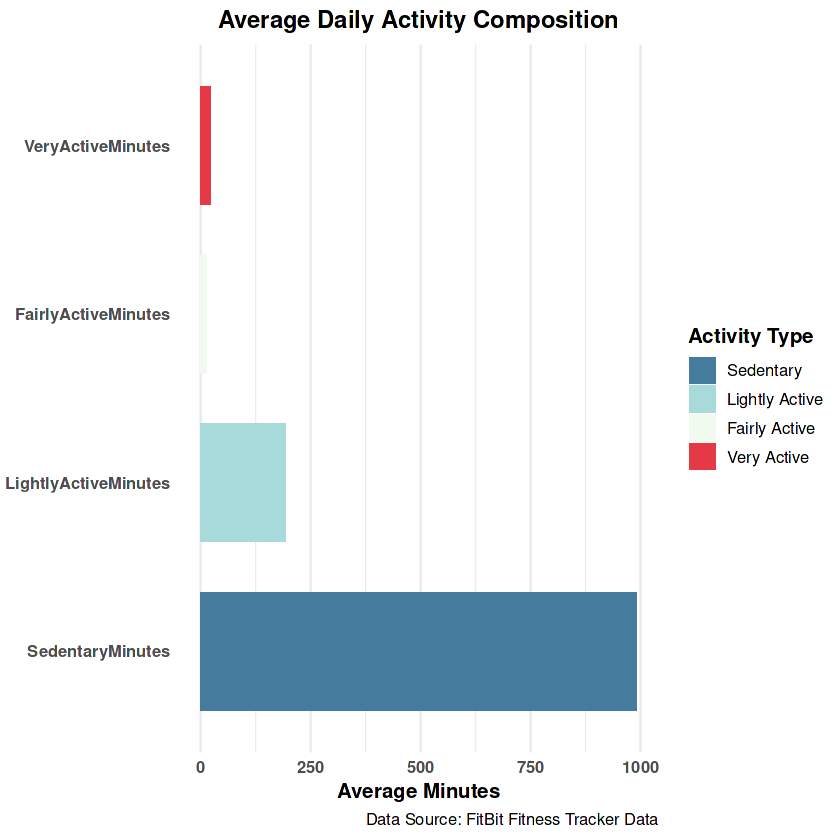

In [12]:
library(dplyr)
library(tidyr)
library(ggplot2)

# Summarize average activity minutes per type
activity_summary <- final_df %>%
  select(VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes) %>%
  drop_na() %>%
  summarise(
    VeryActiveMinutes = mean(VeryActiveMinutes),
    FairlyActiveMinutes = mean(FairlyActiveMinutes),
    LightlyActiveMinutes = mean(LightlyActiveMinutes),
    SedentaryMinutes = mean(SedentaryMinutes)
  ) %>%
  pivot_longer(
    cols = everything(),
    names_to = "activity_type",
    values_to = "avg_minutes"
  )

# Fix factor levels
activity_summary$activity_type <- factor(activity_summary$activity_type,
                                         levels = c("SedentaryMinutes", "LightlyActiveMinutes", 
                                                    "FairlyActiveMinutes", "VeryActiveMinutes"))

# Define colors
activity_colors <- c(
  "SedentaryMinutes" = "#457B9D",
  "LightlyActiveMinutes" = "#A8DADC",
  "FairlyActiveMinutes" = "#F1FAEE",
  "VeryActiveMinutes" = "#E63946"
)

# Plot horizontal bar chart
ggplot(activity_summary, aes(x = activity_type, y = avg_minutes, fill = activity_type)) +
  geom_col(width = 0.7) +
  scale_fill_manual(values = activity_colors,
                    labels = c("Sedentary", "Lightly Active", "Fairly Active", "Very Active")) +
  coord_flip() +
  theme_minimal(base_size = 12) +
  theme(
    axis.title.y = element_blank(),
    axis.title.x = element_text(face = "bold"),
    axis.text = element_text(face = "bold"),
    panel.grid.major.y = element_blank(),
    legend.position = "right",
    legend.title = element_text(face = "bold"),
    plot.title = element_text(face = "bold", hjust = 0.5, size = 14)
  ) +
  labs(
    title = "Average Daily Activity Composition",
    y = "Average Minutes",
    fill = "Activity Type",
    caption = "Data Source: FitBit Fitness Tracker Data"
  )


**Insight**: Most users spend the majority of their day in **sedentary** or **light-intensity activity**, highlighting the potential to increase moderate-to-vigorous activity for improved health.


### 4.3 Sleep Patterns in Relation to Distance Covered
This analysis explores how users’ **sleep duration relates to the distance they cover**, highlighting potential links between activity levels and rest.

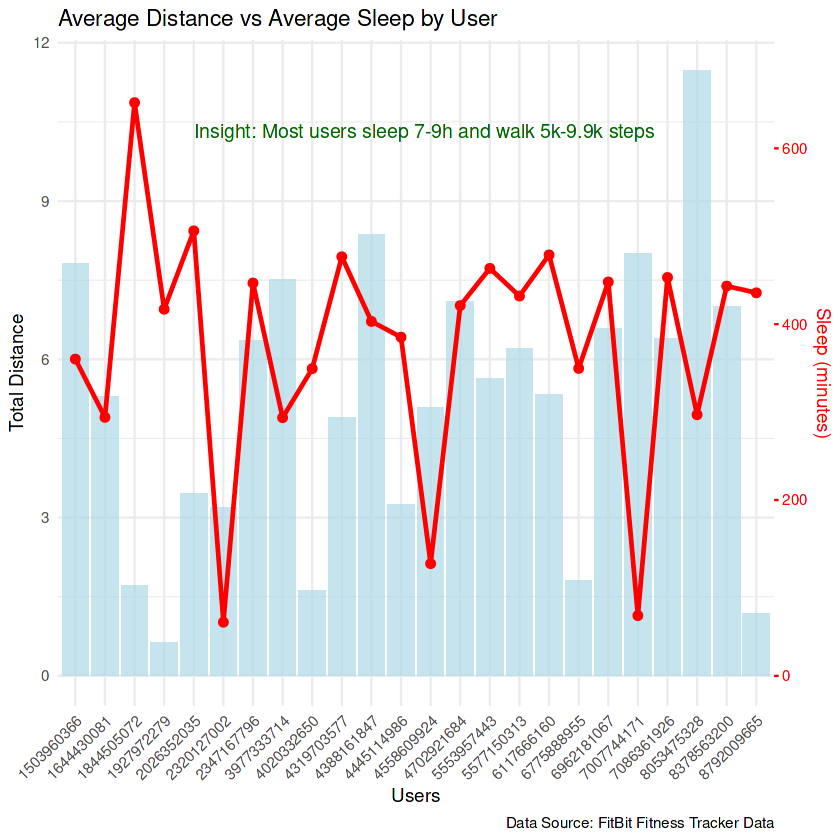

In [13]:
library(dplyr)
library(ggplot2)

# Aggregate data by user
agg <- final_df %>%
  select(Id, TotalDistance, TotalMinutesAsleep) %>%
  group_by(Id) %>%
  summarise(
    TotalDistance = mean(TotalDistance, na.rm = TRUE),
    TotalMinutesAsleep = mean(TotalMinutesAsleep, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  drop_na()

# Plot
ggplot(agg, aes(x = factor(Id))) +
  geom_col(aes(y = TotalDistance), fill = "lightblue", alpha = 0.7) +
  geom_line(aes(y = TotalMinutesAsleep / 60, group = 1), color = "red", linewidth = 1) +
  geom_point(aes(y = TotalMinutesAsleep / 60), color = "red", size = 2) +
  scale_y_continuous(
    name = "Total Distance",
    sec.axis = sec_axis(~ . * 60, name = "Sleep (minutes)")
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.y.right = element_text(color = "red"),
    axis.ticks.y.right = element_line(color = "red"),
    axis.text.y.right = element_text(color = "red")
  ) +
  labs(
    title = "Average Distance vs Average Sleep by User",
    x = "Users",
    caption = "Data Source: FitBit Fitness Tracker Data"
  ) +
  annotate(
    "text", x = 5, y = max(agg$TotalDistance)*0.9, 
    label = "Insight: Most users sleep 7-9h and walk 5k-9.9k steps",
    color = "darkgreen", size = 4, hjust = 0
  )


**Insight:**
Most users spend **7–9 hours sleeping** and take **5,000–9,999 steps** daily. Short sleepers (<7h) tend to have lower activity levels, while very few users sleep more than 9 hours or achieve high step counts. This suggests that moderate sleep and moderate activity are the most common patterns among users. 

We can observe that covering a greater distance doesn’t necessarily lead to better sleep. On average, the best sleep is achieved when daily steps are **less than 10,000**.

### 4.4  Relationship Between Users’ Sleep Difficulty and Steps Taken
Analyzing how the number of steps taken during the day relates to time spent in bed awake.


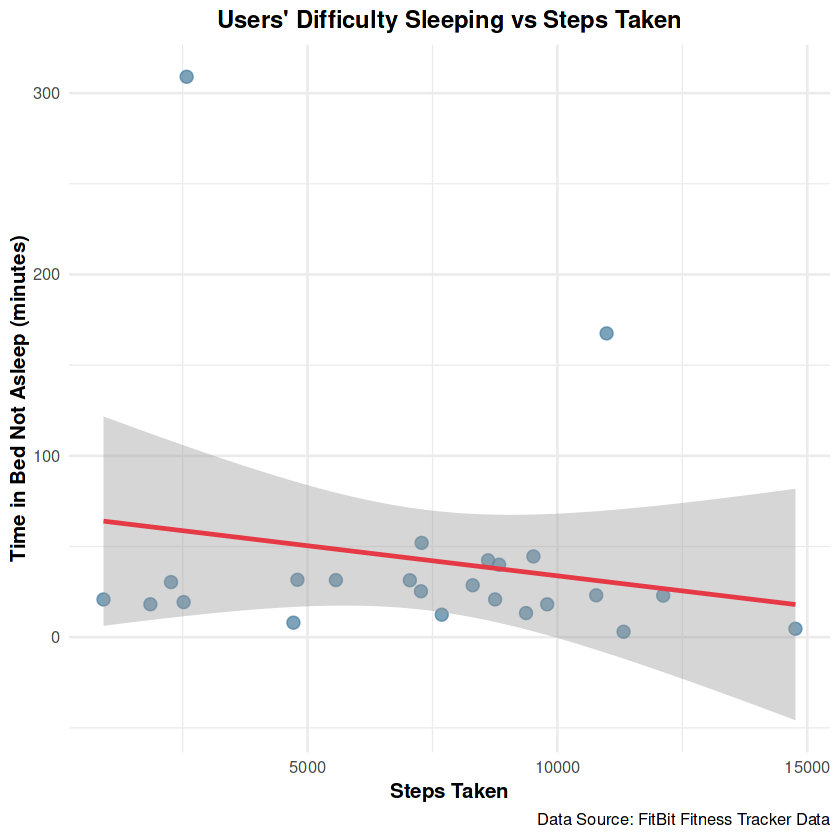

In [14]:
library(dplyr)
library(ggplot2)

# Prepare data: calculate time in bed not asleep
sleep_difficulty <- final_df %>%
  mutate(no_sleeping = TotalTimeInBed - TotalMinutesAsleep) %>%
  select(Id, TotalSteps, no_sleeping) %>%
  group_by(Id) %>%
  summarise(
    TotalSteps = mean(TotalSteps, na.rm = TRUE),
    no_sleeping = mean(no_sleeping, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  drop_na()

# Plot scatter with regression line
ggplot(sleep_difficulty, aes(x = TotalSteps, y = no_sleeping)) +
  geom_point(color = "#457B9D", size = 3, alpha = 0.7) +
  geom_smooth(method = "lm", formula = y ~ x, color = "#E63946", se = TRUE, linewidth = 1) +
  theme_minimal(base_size = 12) +
  labs(
    title = "Users' Difficulty Sleeping vs Steps Taken",
    x = "Steps Taken",
    y = "Time in Bed Not Asleep (minutes)",
    caption = "Data Source: FitBit Fitness Tracker Data"
  ) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5, size = 14),
    axis.title = element_text(face = "bold")
  )


****Insight**: Majority of users tend to spend around 50 minutes in bed not asleep. However, there are a couple outliers that seem to have insomia.**

### 4.5 Sleep vs Sedentary Time
Do Sleep Habits Influence Sedentary Time?

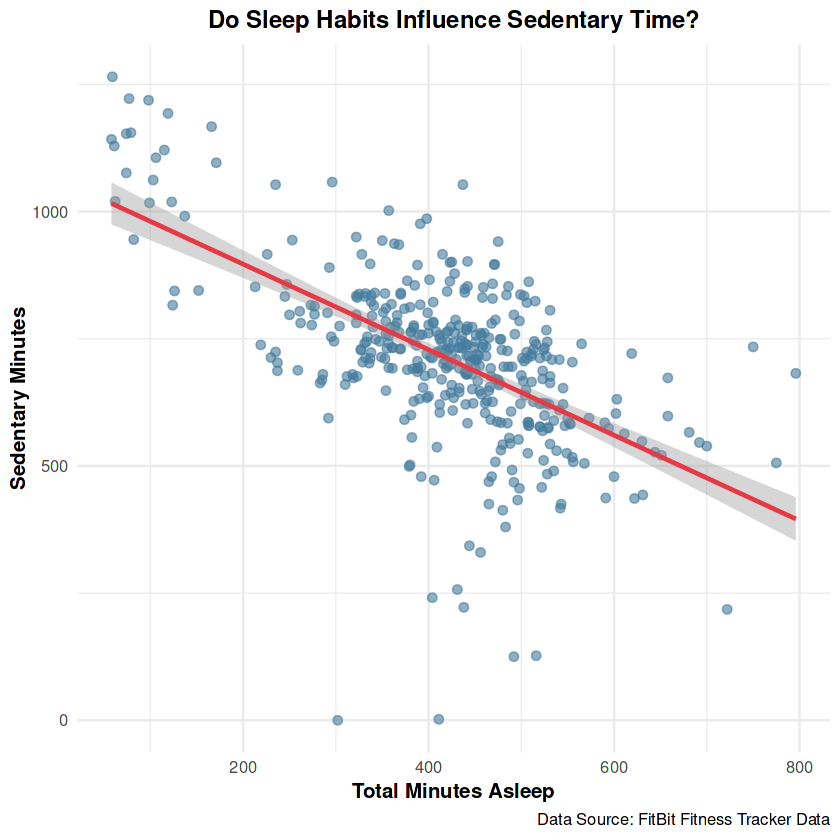

In [15]:
library(dplyr)
library(ggplot2)

# Prepare data
activity_sleep_df <- final_df %>%
  select(TotalMinutesAsleep, SedentaryMinutes) %>%
  drop_na()

# Plot scatter with regression line
ggplot(activity_sleep_df, aes(x = TotalMinutesAsleep, y = SedentaryMinutes)) +
  geom_point(alpha = 0.6, color = "#457B9D", size = 2) +
  geom_smooth(method = "lm", formula = y ~ x, color = "#E63946", se = TRUE, linewidth = 1) +
  theme_minimal(base_size = 12) +
  labs(
    title = "Do Sleep Habits Influence Sedentary Time?",
    x = "Total Minutes Asleep",
    y = "Sedentary Minutes",
    caption = "Data Source: FitBit Fitness Tracker Data"
  ) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5, size = 14),
    axis.title = element_text(face = "bold")
  )


**Insight**: Users who sleep more tend to be less sedentary, suggesting that longer sleep duration may be associated with higher daytime activity.

### 4.6 Weekday vs Weekend Activity

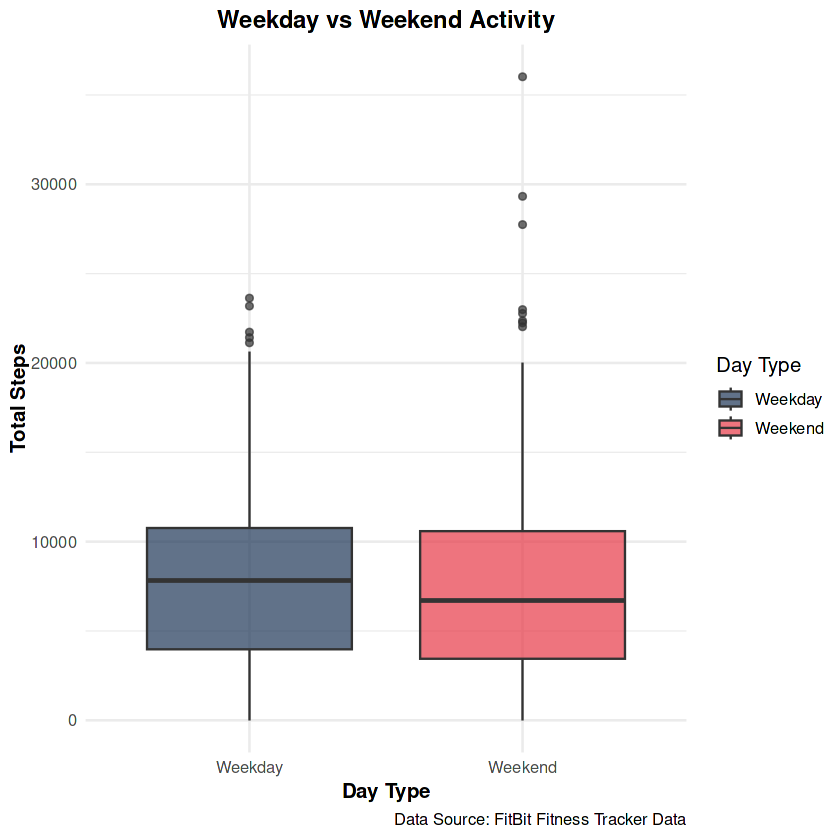

In [16]:
library(dplyr)
library(ggplot2)

# Prepare data
week_activity <- final_df %>%
  mutate(
    day_type = ifelse(weekdays(Date) %in% c("Saturday", "Sunday"), "Weekend", "Weekday")
  ) %>%
  select(day_type, TotalSteps) %>%
  drop_na()

# Boxplot
ggplot(week_activity, aes(x = day_type, y = TotalSteps, fill = day_type)) +
  geom_boxplot(alpha = 0.7) +
  scale_fill_manual(values = c("Weekday" = "#1D3557", "Weekend" = "#E63946")) +
  theme_minimal(base_size = 12) +
  labs(
    title = "Weekday vs Weekend Activity",
    x = "Day Type",
    y = "Total Steps",
    fill = "Day Type",
    caption = "Data Source: FitBit Fitness Tracker Data"
  ) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5, size = 14),
    axis.title = element_text(face = "bold")
  )


**Insight:** Users walk a bit more on weekdays, but weekends have more ups and downs, some days very active, some not.

## Step 5: Share

### 5.1 Key Takeaways
Users maintain fairly consistent daily step counts throughout the week. The Bellabeat app could leverage this consistency to recommend personalized step goals and track progress automatically.

Most users spend the majority of their day in sedentary or light-intensity activity. The app could encourage more moderate-to-vigorous activity by sending timely notifications or suggesting small lifestyle changes to reduce sedentary time.

Most users sleep 7–9 hours and take 5,000–9,999 steps daily. Short sleepers (<7h) tend to be less active. The app could provide tailored guidance to balance sleep and activity levels for better wellness.

Walking longer distances does not necessarily improve sleep. The app could recommend **moderate daily steps (<10,000)** for users aiming to maintain healthy sleep patterns without overexertion.

Users who sleep more tend to be less sedentary during the day. The Bellabeat app could offer insights and tips to improve sleep duration, which in turn may encourage higher daytime activity.

Steps are slightly higher on weekdays, with more variability on weekends. The app could send weekend reminders, challenges, or motivational prompts to help users maintain consistent activity levels.

Most users spend around 50 minutes in bed not asleep, with a few outliers showing potential insomnia. The app could provide **sleep efficiency tips**, guided bedtime routines, or relaxation suggestions to help users improve rest.
improve rest.

### 5.2 Bellabeat Membership Program Experience

Based on the user insights, the Bellabeat app can translate these findings into actionable features:

- **Personalized Step Goals:** Leverage consistent daily activity to recommend individualized targets and track progress automatically.  
- **Activity Reminders:** Send timely notifications to reduce sedentary time and encourage moderate-to-vigorous activity.  
- **Sleep Guidance:** Offer tailored tips, bedtime routines, and relaxation suggestions to improve sleep quality and duration.  
- **Weekend Motivation:** Provide challenges or prompts to maintain consistent activity levels even on weekends.  
- **Wellness Recommendations:** Suggest light-to-moderate exercise for better sleep and overall health without overexertion.  


### 5.3 Marketing Strategy / Recommendations

Insights from user behavior can guide Bellabeat’s marketing and engagement efforts:

- **Highlight Data-Driven Personalization:** Promote how the app uses real user data to provide customized activity and sleep guidance.  
- **Emphasize Benefits of Consistent Activity:** Show how membership helps users maintain steady daily habits, even on weekends.  
- **Showcase Sleep Optimization Features:** Market the app’s capability to improve sleep through personalized routines and tips.  
- **Encourage Membership Engagement:** Use challenges, notifications, and progress tracking as promotional hooks for increased adoption.  
- **Position Bellabeat as a Science-Backed Wellness Solution:** Reinforce credibility by demonstrating that recommendations are based on actual user data trends.